In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
raw_m = pd.read_csv('men.dat', header=None)
raw_w = pd.read_csv('women.dat', header=None)

# Part 1
Plot the histogram of women and men heights.

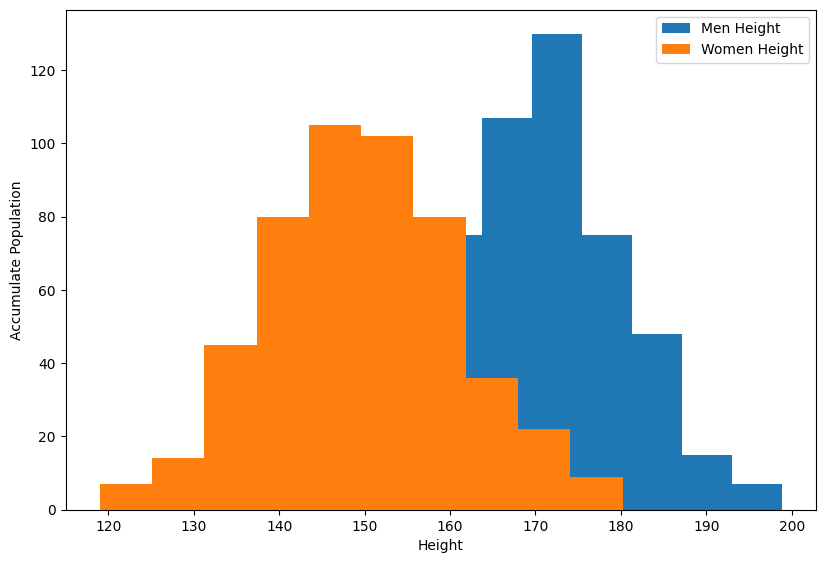

In [3]:
fig_hist = plt.figure(figsize=(15,10))
ax_hist = fig_hist.add_axes([0.1, 0.1, 0.5, 0.5])
ax_hist.hist(raw_m, label='Men Height')
ax_hist.hist(raw_w, label='Women Height')
ax_hist.set_ylabel('Accumulate Population')
ax_hist.set_xlabel('Height')
plt.legend()
fig_hist.show()